<a href="https://colab.research.google.com/github/amanda-araujo/modelagem-matematica/blob/main/Equacao_do_Calor_exerciciosResolucoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='blue'>SME241 - Introdução à Modelagem Matemática</font>
## <font color='blue'>Transferência de Calor</font>

### Exercícios

**Material Produzido por Luis Gustavo Nonato**<br>
**SME/ICMC - USP São Carlos**

----

Resolução: Amanda Araujo Silva

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1):
Considere a função

$$
f(x)=exp(-x^2)
$$

Aproxime a função no ponto $x=1$ utilizando o polinômio de Taylor de segundo grau, como descrito abaixo

$$
f(x+h) = f(x)+f'(x)h + f''(x)\frac{h^2}{2}
$$

1.1) Qual o valor da aproximação no ponto x=1,05?

1.2) Faça o gráfico da função e da aproximação obtida na vizinhança do ponto  $x=1$.

### Exercício 2):
Utilizando o polinômio de Taylor, aproxime a primeira e segunda derivadas da função $f(x)=\cos(x)$ no intervalo $[0,2\pi]$. Faça os gráficos das aproximações e das funções derivadas e calcule o erro médio quadrático das aproximações.

### Exercício 3):
Considere a equação do calor como descrita abaixo:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

Suponha que $t\in[0,2]$, $x\in[0,2]$, $\kappa=2$ e condições de contorno $c_0(t)=(t-1)^2$ e $c_1(t)=1$:

Assumindo $\Delta x = 0.1$, qual deve ser o valor de $\Delta t$ para que o método numérico por diferenças finitas seja estável?

> Condição de estabilidade para o método numérico por diferenças finitas:
$κ \frac{Δt}{Δx^2} ≤ \frac{1}{2}$

In [ ]:
# Condição de estabilidade solução numérica
# Método: diferenças finitas
dx = 0.1
kappa = 2

print("Passo dt para estabilidade do método numérico (menor igual a):", 0.5*dx**2/kappa)

Passo dt para estabilidade do método numérico (menor igual a): 0.0025000000000000005


### Exercício 4)
Considerando os dados do exercício anterior, encontre a distribuição de calor em três instantes de tempo diferentes. Faça o gráfico de $u(x,t)$ nestes três instantes de tempo.  

> Aproximação da equação de calor pelo método das diferenças finitas:
>
> $u(x_i, t_{i + 1}) = u(x_i, t_i) + Δt κ (\frac{u(x_{i-1}, t_i) - 2u(x_i, t_i) + u(x_{i+1}, t_i)}{Δx^2})$

> A temperatura do ponto $x_i$ no instante seguinte $t_{i + 1}$ depende da temperatura atual do ponto e a temperatura atual dos dois vizinhos do ponto.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
[0.    0.002 0.004 ... 1.996 1.998 2.   ]
Número de passos na discretização temporal: 1001


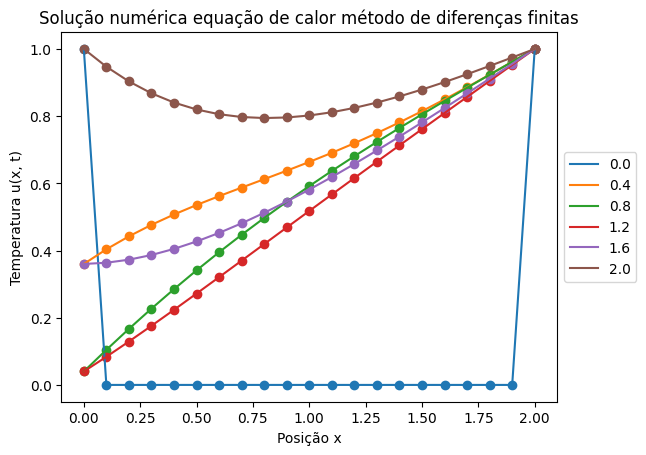

In [148]:
# Solução numérica - Equação Calor
# Método: diferenças finitas

# Parâmetros
dx = 0.1
dt = 0.002
kappa = 2

# Limites espaço - tempo
xmin = 0
xmax = 2
tmin = 0
tmax = 2
xpassos = int((xmax - xmin)/dx + 1)
tpassos = int((tmax - tmin)/dt + 1)

x = np.linspace(xmin, xmax, int(xpassos)) # [0, 2], dx
t = np.linspace(tmin, tmax, int(tpassos)) # [0, 2], dt

print(x)
print(t)
print('Número de passos na discretização temporal:', tpassos)

u = np.zeros((xpassos, tpassos)) # u(x, t) - Solução

# Condições de contorno (Dirichilet)
u[0, :] = (t - 1)**2  # u(xmin, t) = u(0, t)
u[-1, :] = 1          # u(xmax, t) = u(L, t)

# Solução numérica: diferenças finitas
# Cálculo da temperatura em cada ponto da barra, para todos os tempos
for i in range(1, len(t)):
  for j in range(1, len(x) - 1): # ponta
    u[j, i] = u[j, i-1] + dt*kappa*(u[j-1, i-1] - 2*u[j, i-1] + u[j+1, i-1])/dx**2

# Plot da solução numérica
# Distribuição da temperatura na barra para diferentes instantes de tempo
for i in range(0, tpassos, 200):
  plt.plot(x, u[:,i], label=str(round(i*dt, 2)))
  plt.scatter(x, u[:,i])  # pontos calculados numericamente pela discretização
plt.xlabel('Posição x')
plt.ylabel('Temperatura u(x, t)')
plt.title('Solução numérica equação de calor método de diferenças finitas')
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")
plt.show()

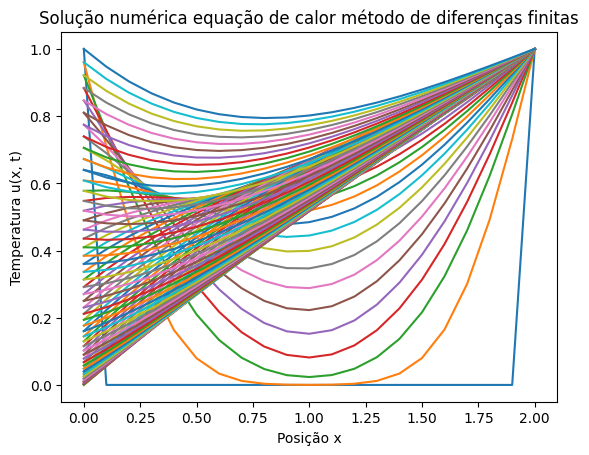

In [149]:
# Plot da solução numérica
# Distribuição da temperatura na barra para diferentes instantes de tempo
for i in range(0, tpassos, 10):
    plt.plot(x, u[:,i], label=str(round(i*dt, 2)))
plt.xlabel('Posição x')
plt.ylabel('Temperatura u(x, t)')
plt.title('Solução numérica equação de calor método de diferenças finitas')
#plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")
plt.show()

# Plot da solução numérica
# Distribuição da temperatura na barra para diferentes instantes de tempo
# for i in range(0, tpassos):
#   plt.plot(x, u[:,i], label=str(round(i*dt, 2)))
#   plt.scatter(x, u[:,i])  # pontos calculados numericamente pela discretização
# plt.xlabel('Posição x')
# plt.ylabel('Temperatura u(x, t)')
# plt.title('Solução numérica equação de calor método de diferenças finitas')
# #plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")
# plt.show()

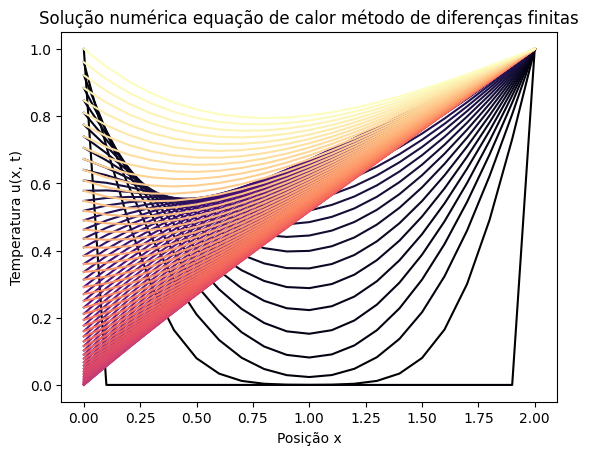

In [169]:
# Plot
cmap = plt.get_cmap('magma') #'gist_rainbow' 'viridis' 'hsv' 'hot_r' 'plasma'
norm = plt.Normalize(t.min(), t.max())
line_colors = cmap(norm(t))

for i in range(0, tpassos, 10):
    plt.plot(x, u[:,i], label=str(round(i*dt, 2)), color = line_colors[i])
plt.xlabel('Posição x')
plt.ylabel('Temperatura u(x, t)')
plt.title('Solução numérica equação de calor método de diferenças finitas')
plt.show()

<ipython-input-181-5f34e4b91d23>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m, shrink=0.8) # t


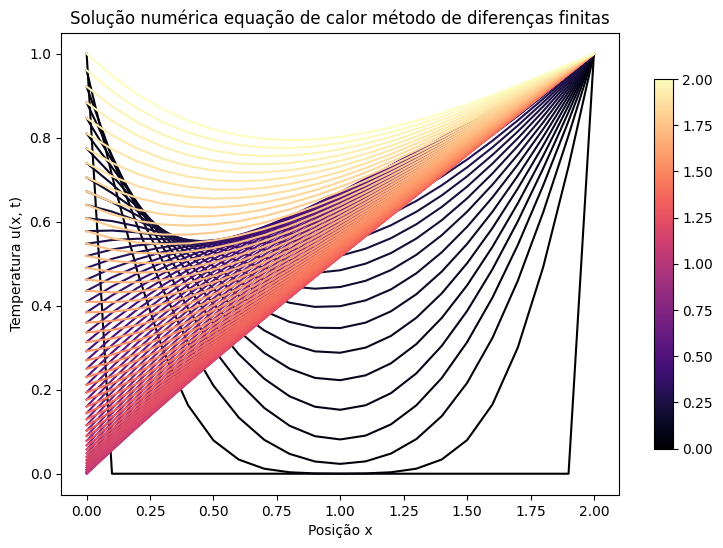

In [181]:
# Plot
from matplotlib import cm
plt.figure(figsize=(9, 6))

cmap = cm.magma #'gist_rainbow' 'viridis' 'hsv' 'hot_r' 'plasma'
m = cm.ScalarMappable(cmap=cmap) # Mapeia cmap para colorbar
m.set_array(t)                   # Aplica escala de t na colorbar
norm = plt.Normalize(t.min(), t.max())
line_colors = cmap(norm(t))

for i in range(0, tpassos, 10):
    plt.plot(x, u[:,i], label=str(round(i*dt, 2)), color = line_colors[i])
plt.xlabel('Posição x')
plt.ylabel('Temperatura u(x, t)')
plt.title('Solução numérica equação de calor método de diferenças finitas')
plt.colorbar(m, shrink=0.8) # t
plt.show()

> *Note que*: a solução numérica é computada considerando-se a discretização espacial-temporal do problema. A solução numérica é computada de fato somente para os **pontos da discretização**.

In [27]:
print('Discretização espaço:', x)
print('Quantidade de pontos na discretização do espaço:', len(x))

Discretização espaço: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
Quantidade de pontos na discretização do espaço: 21


In [28]:
print('Discretização tempo:', t)
print('Quantidade de pontos na discretização do tempo:', len(t))

Discretização tempo: [0.    0.002 0.004 ... 1.996 1.998 2.   ]
Quantidade de pontos na discretização do tempo: 1001


> Checando se um valor de interesse faz parte do conjunto de pontos da discretização do problema:

In [107]:
def pontoDiscretizacao(pontox, pontot, x, t):
  auxx = 0
  indx = -2
  for i in range(len(x)):
    if (round(x[i], 3) == pontox): #ponto flutuante
      print('Valor x =', pontox, 'Presente na posição índice:', i)
      auxx = 1
      indx = i
      break
  if (auxx == 0):
    print('Valor x =', pontox, 'não está presente na discretização')

  auxt = 0
  indt = -2
  for i in range(len(t)):
    if (round(t[i], 3) == pontot):  #ponto flutuante
      print('Valor t =', pontot, 'Presente na posição índice:', i)
      auxt = 1
      indt = i
      break
  if (auxt == 0):
    print('Valor t =', pontot, 'não está presente na discretização')

  return auxx, indx, auxt, indt

In [108]:
pontox = 1.000
pontot = 1.000

auxx, indx, auxt, indt = pontoDiscretizacao(pontox, pontot, x, t)
print('Índice x:', indx, 'Índice t:', indt)

Valor x = 1.0 Presente na posição índice: 10
Valor t = 1.0 Presente na posição índice: 500
Índice x: 10 Índice t: 500


In [109]:
auxx, indx, auxt, indt = pontoDiscretizacao(0, 0, x, t)
auxx, indx, auxt, indt = pontoDiscretizacao(2, 2, x, t)
auxx, indx, auxt, indt = pontoDiscretizacao(0.6, 1.000, x, t) # 0.6 faz parte da discretização do espaço! #ponto flutuante
auxx, indx, auxt, indt = pontoDiscretizacao(1.33, 1.234, x, t)

Valor x = 0 Presente na posição índice: 0
Valor t = 0 Presente na posição índice: 0
Valor x = 2 Presente na posição índice: 20
Valor t = 2 Presente na posição índice: 1000
Valor x = 0.6 Presente na posição índice: 6
Valor t = 1.0 Presente na posição índice: 500
Valor x = 1.33 não está presente na discretização
Valor t = 1.234 Presente na posição índice: 617


In [111]:
# Checando discretização de x e t de maneira independente
def pontoxDiscretizacao(pontox, x):
  auxx = 0
  indx = -2
  for i in range(len(x)):
    if (round(x[i], 3) == pontox): #ponto flutuante
      print('Valor x =', pontox, 'Presente na posição índice:', i)
      auxx = 1
      indx = i
      break
  if (auxx == 0):
    print('Valor x =', pontox, 'não está presente na discretização')

  return auxx, indx

def pontotDiscretizacao(pontot, t):
  auxt = 0
  indt = -2
  for i in range(len(t)):
    if (round(t[i], 3) == pontot):  #ponto flutuante
      print('Valor t =', pontot, 'Presente na posição índice:', i)
      auxt = 1
      indt = i
      break
  if (auxt == 0):
    print('Valor t =', pontot, 'não está presente na discretização')

  return auxt, indt

In [113]:
auxx, indx = pontoxDiscretizacao(2.000, x)

Valor x = 2.0 Presente na posição índice: 20


In [114]:
auxt, indt = pontotDiscretizacao(1.0, t)

Valor t = 1.0 Presente na posição índice: 500


Faça um gráfico da solução aproximada em  u(x,1)  e o ponto  u(2,1)  apontado na solução.

Valor t = 1.0 Presente na posição índice: 500


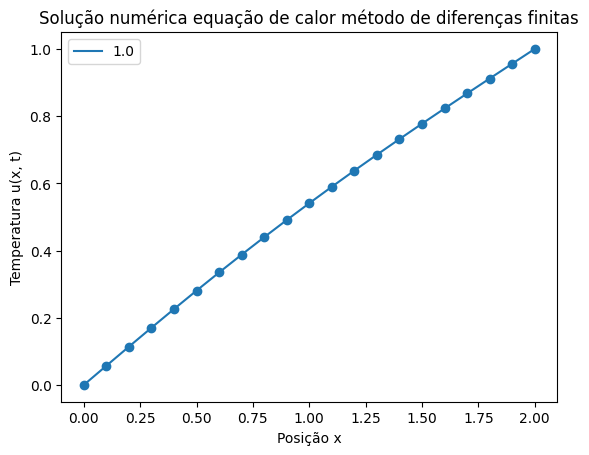

In [123]:
auxt, indt = pontotDiscretizacao(1.0, t)

# gráfico solução aproximada em u(x, 1)
plt.plot(x, u[:, indt], label=str(t[indt])) # u(x, t)
plt.scatter(x, u[:, indt])
plt.xlabel('Posição x')
plt.ylabel('Temperatura u(x, t)')
plt.title('Solução numérica equação de calor método de diferenças finitas')
plt.legend()
plt.show()

Valor x = 2.0 Presente na posição índice: 20


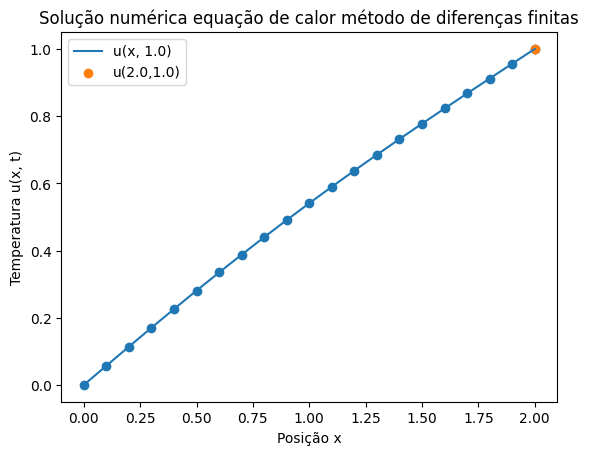

In [130]:
auxx, indx = pontoxDiscretizacao(2.000, x)

# gráfico solução aproximada, ponto u(2, 1)
plt.plot(x, u[:, indt], label='u(x, ' + str(t[indt]) + ')') # u(x, t)
plt.scatter(x, u[:, indt])
plt.scatter(2.000, u[indx, indt], label='u('+ str(x[indx]) + ',' + str(t[indt]) + ')')
plt.xlabel('Posição x')
plt.ylabel('Temperatura u(x, t)')
plt.title('Solução numérica equação de calor método de diferenças finitas')
plt.legend()
plt.show()

### Exercício 5)
Considere a equação do calor:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

Suponha que $t\in[0,2\pi]$, $x\in[0,2]$ e condições de contorno $c_0(t)=\cos(t)$ e $c_1(t)=t^2-2\pi t$.

Verifique como o perfil de temperatura muda no instante $t=2\pi$ de acondo com o valor de $\kappa$.

Faça experimentos com valores $\kappa=1,2,3,4$.

Que conlusão você pode tirar do efeito de $\kappa$ na condução do calor?

### Questão 6):
Considere a equação do calor como descrita abaixo:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

Supondo $x\in[0,2]$, $t\in[0,2]$ e $\kappa=1$, com condições de contorno $u(0,t)=t^2$ e $u(2,t)=1$ encontre uma aproximação do valor da solução em $u(1,1)$.

### Exercício 7)
Repita o exercício anterior, porém calculando uma aproximação da solução $u(x_p,t_p)$ para qualquer valor de $x_p$ e $t_p$ no intervalo aberto $[0,2]$.

## Apêndice

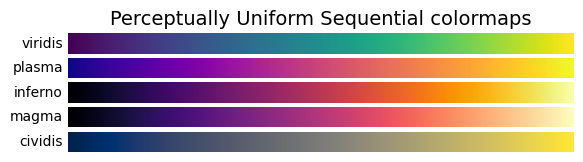

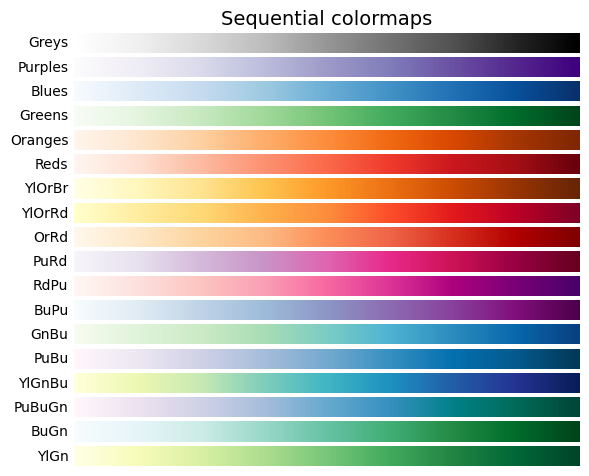

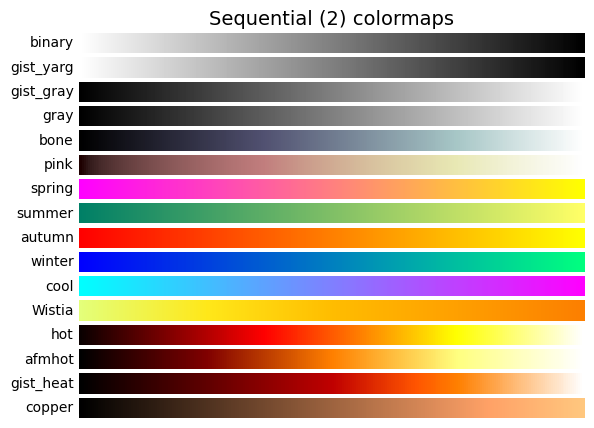

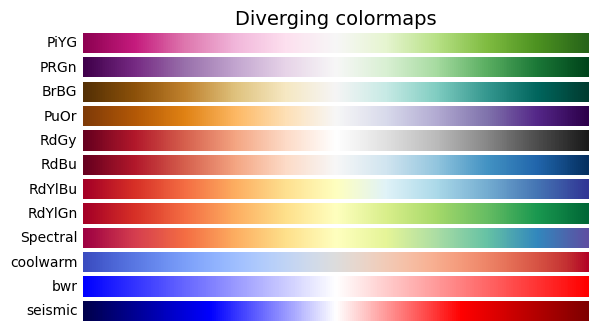

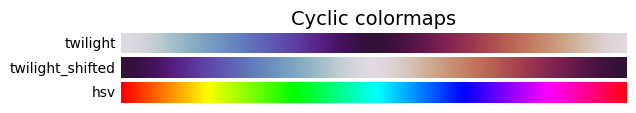

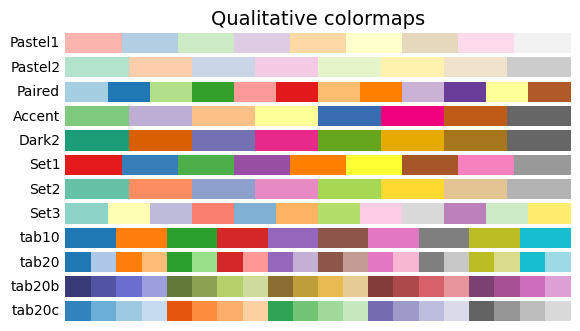

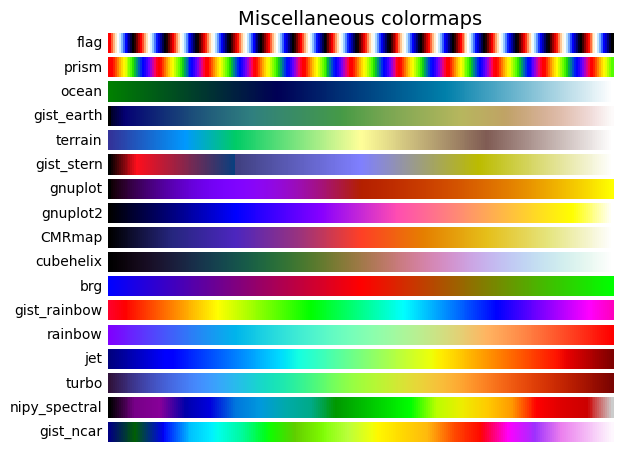

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

In [ ]:
b = np.zeros((10, 5)) # b(x, t)
print(b)
print('------------')

b[0, :] = 10
b[-1, :] = 1
print(b)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
------------
[[10. 10. 10. 10. 10.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]]


In [ ]:
da = 0.1
amin = 0
amax = 10
apassos = (amax - amin)/da
a = np.linspace(0, 10, 10)
print(apassos)
a = np.linspace(amin, amax, int(apassos) + 1)
print(a)

100.0
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


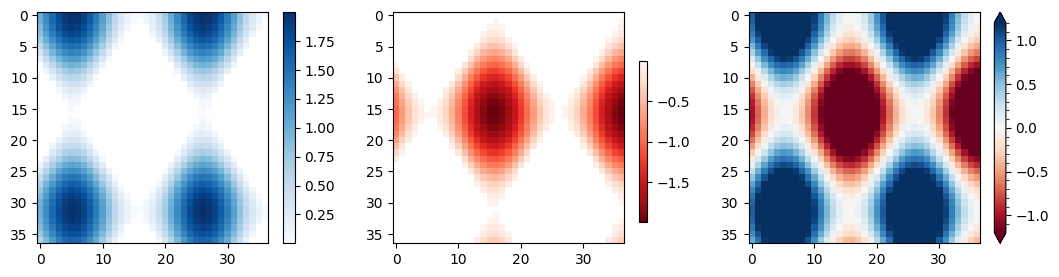

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# setup some generic data
N = 37
x, y = np.mgrid[:N, :N]
Z = (np.cos(x*0.2) + np.sin(y*0.3))

# mask out the negative and positive values, respectively
Zpos = np.ma.masked_less(Z, 0)
Zneg = np.ma.masked_greater(Z, 0)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax1.imshow(Zpos, cmap='Blues', interpolation='none')

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax1)

# repeat everything above for the negative data
# you can specify location, anchor and shrink the colorbar
neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
fig.colorbar(neg, ax=ax2, location='right', anchor=(0, 0.3), shrink=0.7)

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = ax3.imshow(Z, cmap='RdBu', vmin=-1.2, vmax=1.2,
                             interpolation='none')
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar.minorticks_on()
plt.show()